In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

ipl = pd.read_csv("../data/cleaned/ipl_cleaned_ball_by_ball.csv", parse_dates=["date"])

print("Shape:", ipl.shape)
ipl.head()


Shape: (260759, 22)


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,id,date,venue,team1,team2
0,335982,1,kolkata knight riders,royal challengers bengaluru,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,legbyes,0,NaN,NaN,NaN,335982,2008-04-18,M Chinnaswamy Stadium,royal challengers bengaluru,kolkata knight riders
1,335982,1,kolkata knight riders,royal challengers bengaluru,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,NaN,0,NaN,NaN,NaN,335982,2008-04-18,M Chinnaswamy Stadium,royal challengers bengaluru,kolkata knight riders
2,335982,1,kolkata knight riders,royal challengers bengaluru,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,wides,0,NaN,NaN,NaN,335982,2008-04-18,M Chinnaswamy Stadium,royal challengers bengaluru,kolkata knight riders
3,335982,1,kolkata knight riders,royal challengers bengaluru,0,4,BB McCullum,P Kumar,SC Ganguly,0,...,NaN,0,NaN,NaN,NaN,335982,2008-04-18,M Chinnaswamy Stadium,royal challengers bengaluru,kolkata knight riders
4,335982,1,kolkata knight riders,royal challengers bengaluru,0,5,BB McCullum,P Kumar,SC Ganguly,0,...,NaN,0,NaN,NaN,NaN,335982,2008-04-18,M Chinnaswamy Stadium,royal challengers bengaluru,kolkata knight riders


In [2]:
ipl.info()
ipl.describe(include="all").T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260759 entries, 0 to 260758
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   match_id          260759 non-null  int64         
 1   inning            260759 non-null  int64         
 2   batting_team      260759 non-null  object        
 3   bowling_team      260759 non-null  object        
 4   over              260759 non-null  int64         
 5   ball              260759 non-null  int64         
 6   batter            260759 non-null  object        
 7   bowler            260759 non-null  object        
 8   non_striker       260759 non-null  object        
 9   batsman_runs      260759 non-null  int64         
 10  extra_runs        260759 non-null  int64         
 11  total_runs        260759 non-null  int64         
 12  extras_type       14106 non-null   object        
 13  is_wicket         260759 non-null  int64         
 14  play

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
match_id,260759.0,NaN,NaN,NaN,907043.63599,335982.0,548333.0,980967.0,1254066.0,1426312.0,368022.505235
inning,260759.0,NaN,NaN,NaN,1.482212,1.0,1.0,1.0,2.0,2.0,0.499684
batting_team,260759,15,mumbai indians,31409,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bowling_team,260759,15,mumbai indians,31477,NaN,NaN,NaN,NaN,NaN,NaN,NaN
over,260759.0,NaN,NaN,NaN,9.203356,0.0,4.0,9.0,14.0,19.0,5.68064
ball,260759.0,NaN,NaN,NaN,3.624642,1.0,2.0,4.0,5.0,11.0,1.814915
batter,260759,673,V Kohli,6232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bowler,260759,530,R Ashwin,4679,NaN,NaN,NaN,NaN,NaN,NaN,NaN
non_striker,260759,663,V Kohli,6059,NaN,NaN,NaN,NaN,NaN,NaN,NaN
batsman_runs,260759.0,NaN,NaN,NaN,1.264762,0.0,0.0,1.0,1.0,6.0,1.639094


In [3]:
batsman_match_runs = (
    ipl.groupby(["match_id", "date", "batter"])["batsman_runs"]
    .sum()
    .reset_index()
)


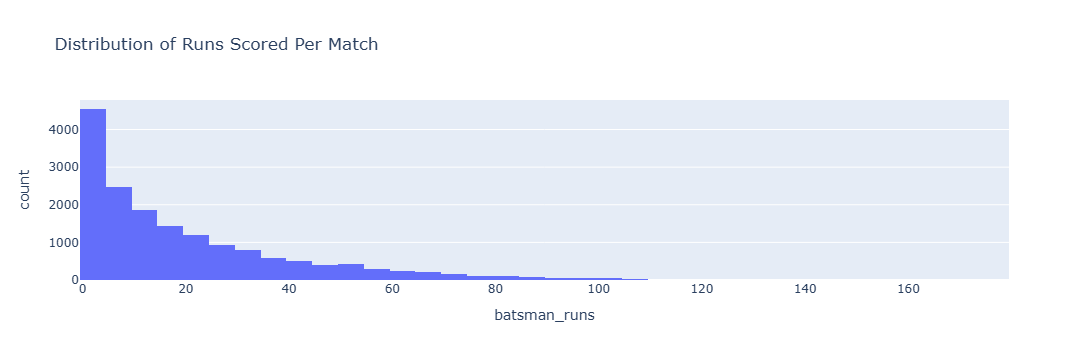

In [4]:
fig = px.histogram(
    batsman_match_runs,
    x="batsman_runs",
    nbins=50,
    title="Distribution of Runs Scored Per Match",
)

fig.show()


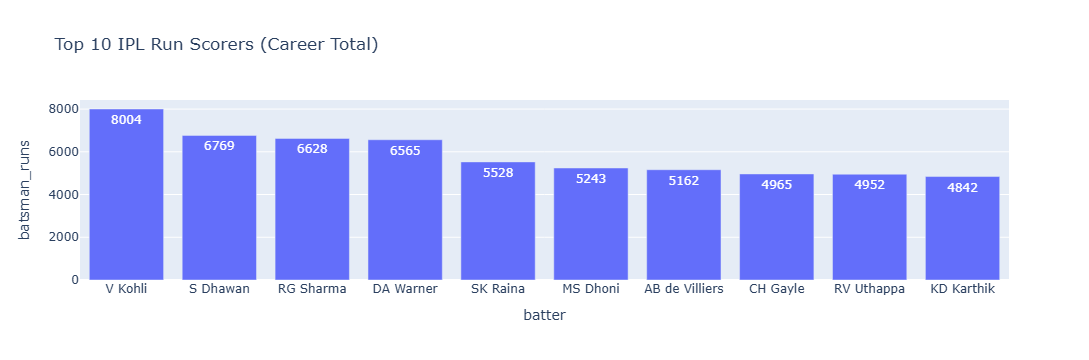

In [5]:
top_batsmen = (
    batsman_match_runs.groupby("batter")["batsman_runs"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

px.bar(
    top_batsmen,
    x="batter",
    y="batsman_runs",
    title="Top 10 IPL Run Scorers (Career Total)",
    text="batsman_runs"
).show()


In [6]:
bowler_match_wickets = (
    ipl[ipl["is_wicket"] == 1]
    .groupby(["match_id", "date", "bowler"])
    .size()
    .reset_index(name="wickets")
)


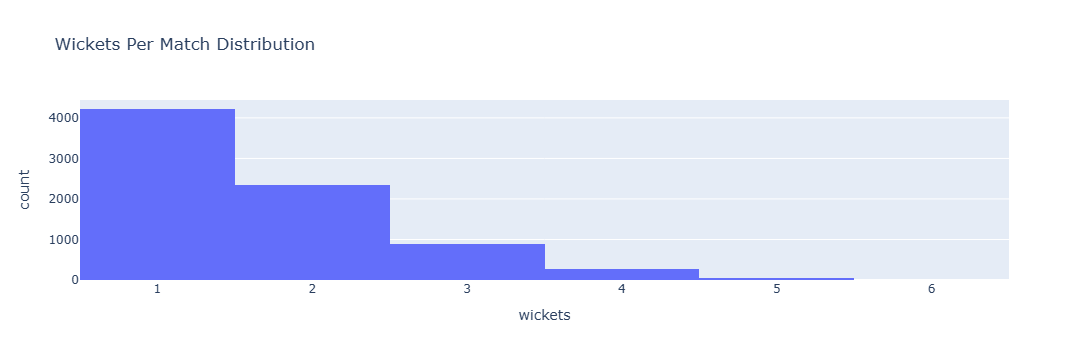

In [7]:
px.histogram(
    bowler_match_wickets,
    x="wickets",
    nbins=10,
    title="Wickets Per Match Distribution"
).show()


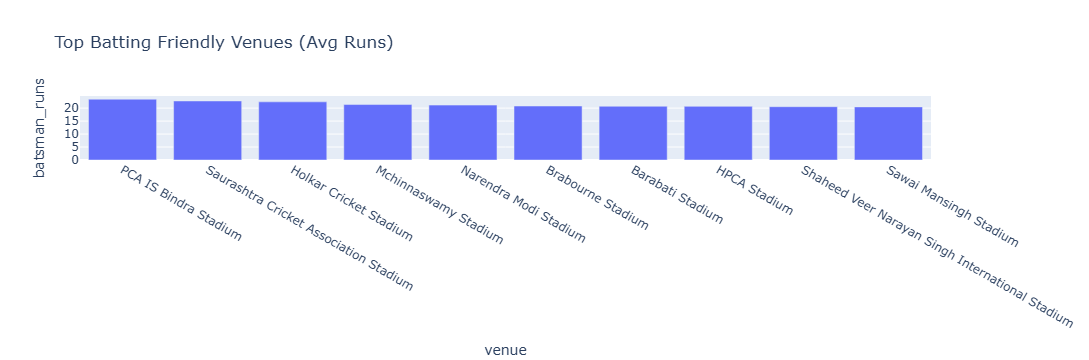

In [8]:
venue_avg_runs = (
    batsman_match_runs.merge(
        ipl[["match_id", "venue"]].drop_duplicates(),
        on="match_id"
    )
    .groupby("venue")["batsman_runs"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

px.bar(
    venue_avg_runs.head(10),
    x="venue",
    y="batsman_runs",
    title="Top Batting Friendly Venues (Avg Runs)"
).show()


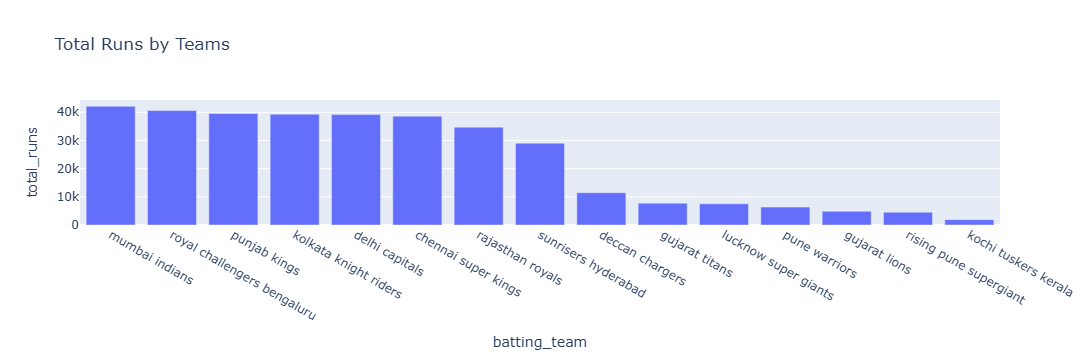

In [9]:
team_runs = (
    ipl.groupby("batting_team")["total_runs"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

px.bar(
    team_runs,
    x="batting_team",
    y="total_runs",
    title="Total Runs by Teams"
).show()


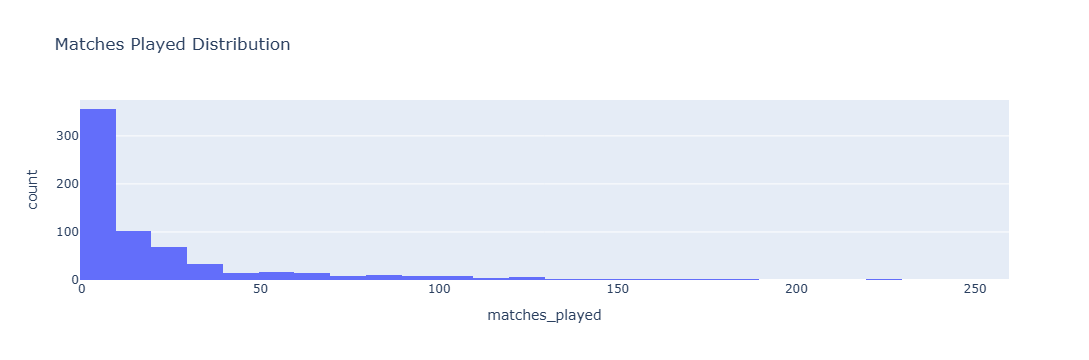

In [10]:
player_match_count = (
    batsman_match_runs.groupby("batter")["match_id"]
    .count()
    .reset_index(name="matches_played")
)

px.histogram(
    player_match_count,
    x="matches_played",
    nbins=50,
    title="Matches Played Distribution"
).show()
